In [45]:
import arviz as az  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import matplotlib.colors as mcolors  # type: ignore
import pickle as pkl
import jax.numpy as jnp

In [46]:
from builtins import open

with open("../rsnl_contaminated_slcp_thetas.pkl", "rb") as input_file:
    thetas = pkl.load(input_file)

with open("../rsnl_contaminated_slcp_adj_params.pkl", "rb") as input_file:
    adj_params = pkl.load(input_file)

In [47]:
thetas.shape

(1, 1000, 5)

In [48]:
thetas = jnp.concatenate(thetas.values, axis=0)
adj_params = jnp.concatenate(adj_params.values, axis=0)

theta_dims = thetas.shape[-1]
summary_dims = adj_params.shape[-1]

In [58]:
var_name_map = {}
reference_values = {}
true_params = jnp.array([0.7, -2.9, -1.0, -0.9, 0.6])
theta_plot = {}
for i in range(theta_dims):
    theta_plot['theta' + str(i+1)] = thetas[:, i]
for ii, k in enumerate(theta_plot):
    # var_name_map[k] = fr'$\{k[:-1]}_{k[-1]}$'
    var_name_map[k] = 'theta' + str(ii+1)  # TODO: for now...
    reference_values[var_name_map[k]] = true_params[ii]  # why does ref_vals match labels and not data? ah well

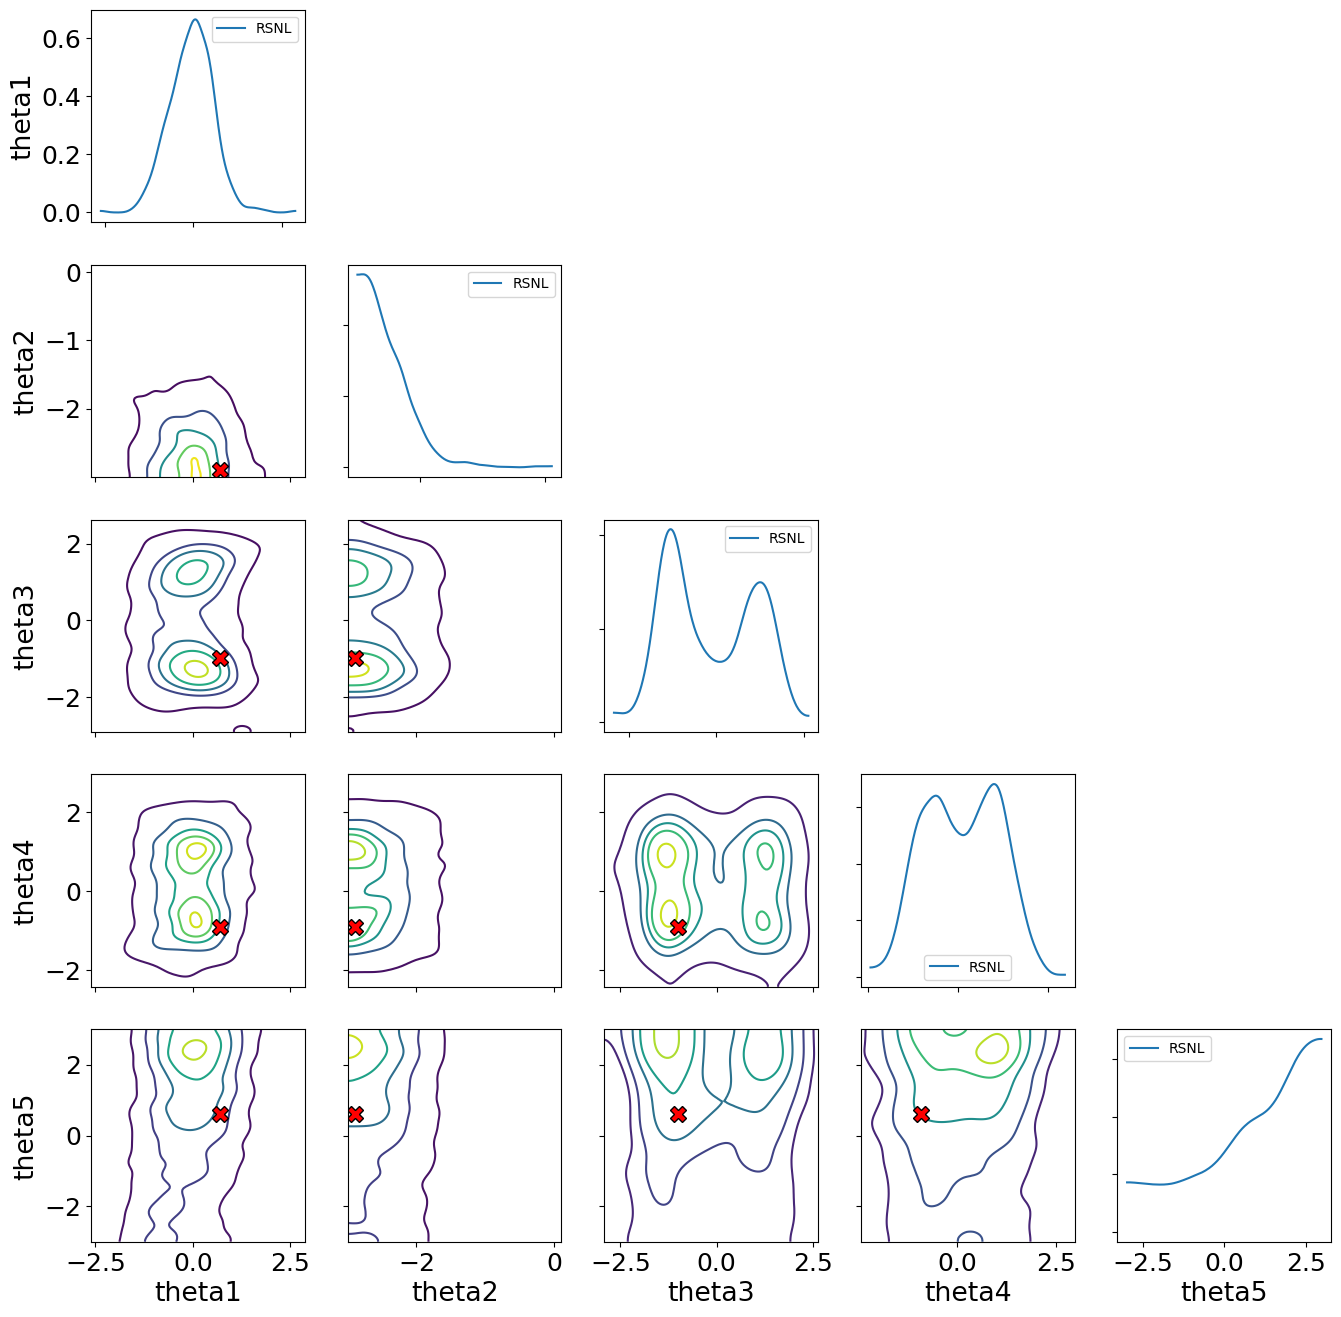

In [59]:
fig, axes = plt.subplots(theta_dims, theta_dims, sharey=False, figsize=(16, 16))
axes = az.plot_pair(theta_plot,
                kind='kde',
                reference_values=reference_values,
                reference_values_kwargs={'color': 'red', 'marker': 'X', 'markersize': 12},
                kde_kwargs={'hdi_probs': [0.05, 0.25, 0.5, 0.75, 0.95],
                            'contour_kwargs': {"colors":None, "cmap":plt.cm.viridis},
                            'contourf_kwargs': {"alpha":0}},
                ax=axes,
                labeller=az.labels.MapLabeller(var_name_map=var_name_map),
                textsize=18,
                marginals=True,
                marginal_kwargs={'label': 'RSNL'},
                # show=False
                # figsize=(64, 64)
                )


In [65]:
az.plot_trace(thetas, compact=False, combined=False);

ValueError: Can only convert xarray dataarray, xarray dataset, dict, netcdf filename, numpy array, pystan fit, emcee fit, pyro mcmc fit, numpyro mcmc fit, cmdstan fit csv filename, cmdstanpy fit to InferenceData, not ArrayImpl

Same but for contaminated normal - i.e. thetas 1-dim

In [60]:
from builtins import open

with open("../rsnl_contaminated_normal_thetas.pkl", "rb") as input_file:
    thetas_c_norm = pkl.load(input_file)

with open("../rsnl_contaminated_normal_adj_params.pkl", "rb") as input_file:
    adj_params_c_norm = pkl.load(input_file)

In [61]:
thetas_c_norm = jnp.concatenate(thetas_c_norm.values, axis=0)
adj_params_c_norm = jnp.concatenate(adj_params_c_norm.values, axis=0)

theta_c_norm_dims = thetas_c_norm.shape[-1]
summary_c_norm_dims = adj_params_c_norm.shape[-1]

In [63]:
var_name_map = {}
reference_values = {}
true_params = jnp.array([1.0])
theta_plot_c_norm = {}
for i in range(theta_c_norm_dims):
    theta_plot_c_norm['theta' + str(i+1)] = thetas_c_norm[:, i]
for ii, k in enumerate(theta_plot_c_norm):
    # var_name_map[k] = fr'$\{k[:-1]}_{k[-1]}$'
    var_name_map[k] = 'theta' + str(ii+1)  # TODO: for now...
    reference_values[var_name_map[k]] = true_params[ii]  # why does ref_vals match labels and not data? ah well

ValueError: Number of variables to be plotted must be 2 or greater.

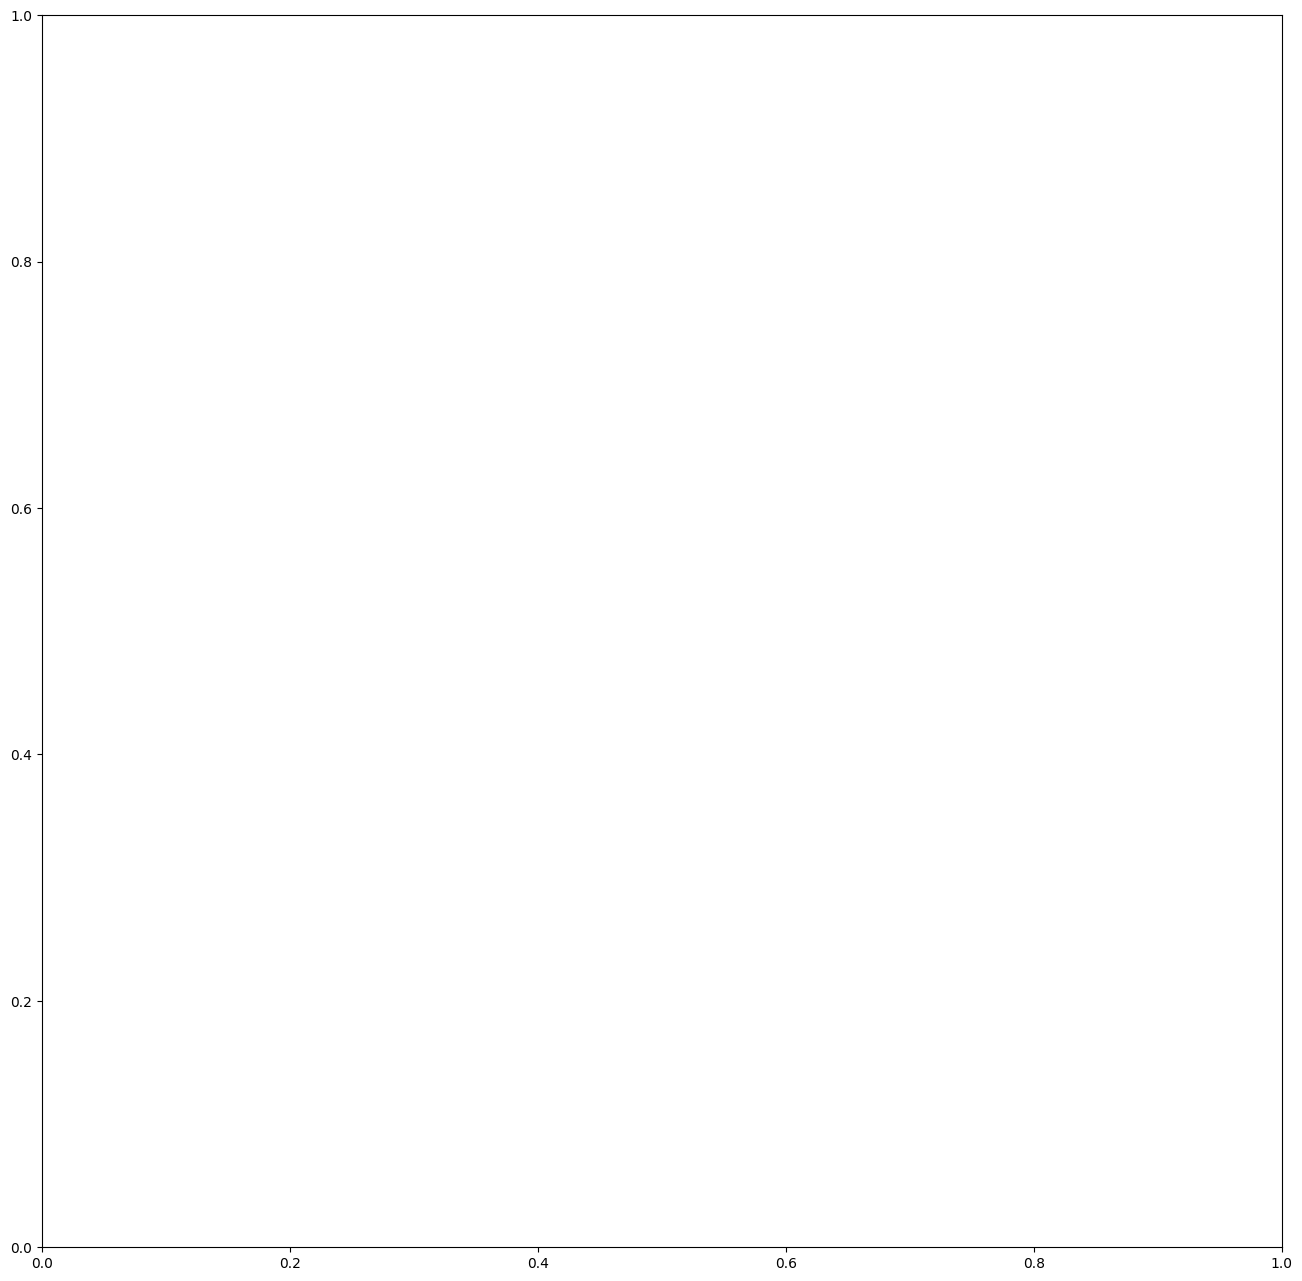

In [64]:


# fig, axes = plt.subplots(theta_c_norm_dims, theta_c_norm_dims, sharey=False, figsize=(16, 16))
# axes = az.plot_pair(theta_plot_c_norm,
#                 kind='kde',
#                 reference_values=reference_values,
#                 reference_values_kwargs={'color': 'red', 'marker': 'X', 'markersize': 12},
#                 kde_kwargs={'hdi_probs': [0.05, 0.25, 0.5, 0.75, 0.95],
#                             'contour_kwargs': {"colors":None, "cmap":plt.cm.viridis},
#                             'contourf_kwargs': {"alpha":0}},
#                 ax=axes,
#                 labeller=az.labels.MapLabeller(var_name_map=var_name_map),
#                 textsize=18,
#                 marginals=True,
#                 marginal_kwargs={'label': 'RSNL'},
#                 # show=False
#                 # figsize=(64, 64)
#                 )
